In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

#1678 O-C

# Expresiones Regulares

## Validando Correos

In [3]:
# compilando la regex
correo = re.compile(r'\b[\w.%+-]+@[\w.-]+\.[a-zA-Z]{2,6}\b')  # busca los correos

In [4]:
while True:
    correo_input = input("Ingrese su correo:")
    if(correo.match(correo_input)):
        print("El correo ingresado es correcto")
        break
    else:
        print("El correo ingresado es incorrecto")

Ingrese su correo:123example@peru.c0m
El correo ingresado es incorrecto
Ingrese su correo:hackspace@peru.@test
El correo ingresado es incorrecto
Ingrese su correo:hackspace@peru.com
El correo ingresado es correcto


## Encontrando URL's

In [5]:
# Nuestra expresion total
url = '<p>Hello World</p><a href="http://example.com">More Examples</a><a href="http://example2.com">Even More Examples</a>'

# Vamos a buscar URL's
urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', url)

print(urls)

['http://example.com', 'http://example2.com']


## Validando una dirección IP

In [6]:
# Validando una dirección IP
patron = ('^(?:(?:25[0-5]|2[0-4][0-9]|'
                '[01]?[0-9][0-9]?)\.){3}'
                '(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$')

ip = re.compile(patron)

listaIP = ["255.255.255.255",
               "256.0.0.255",
               "192.168.12.51",
               "0.0.0.1",
               "182.156.256.1"
               "1.0.0.0",
               "255.256.1.1"]

In [7]:
for item in listaIP:
    if(ip.match(item)):
        print(item + " Es una ip correcta")
    else:
        print(item + " Es una ip incorrecta")

255.255.255.255 Es una ip correcta
256.0.0.255 Es una ip incorrecta
192.168.12.51 Es una ip correcta
0.0.0.1 Es una ip correcta
182.156.256.11.0.0.0 Es una ip incorrecta
255.256.1.1 Es una ip incorrecta


In [2]:
#install pyDF2
!pip install PyPDF2

In [3]:
# importing all the required modules
import PyPDF2

# SEGUNDO EXAMEN

In [4]:
# creating an object 
file = open('notas.pdf', 'rb')

# creating a pdf reader object
fileReader = PyPDF2.PdfFileReader(file)

# print the number of pages in pdf file
print(fileReader)

nro_paginas = fileReader.getNumPages()
print("Hay "+str(nro_paginas)+" paginas")

Hay 113 paginas


In [51]:
TOTAL = []
count = 1
for page in range(nro_paginas):
    pagina = fileReader.getPage(page)
    texto_pagina=pagina.extractText()

    # Obteniendo el cuerpo
    # separando la cabecera
    body = texto_pagina.split("viernes 16 de  febrero 2018",1)
    body = body[1]
    body = body.split("OCAD-UNI")
    final_body = body[0]
    #final_body

    final_body = re.sub('O-C', 'O C', final_body)
    final_body = re.sub('E-H', 'E H', final_body)

    d = r'([A-Z][0-9]|[A-Z])-([0-9][0-9][0-9]|[A-Z]|[0-9][0-9][A-Z])'
    l = re.compile(d).split(final_body)
    #print(l)
        
    arrayAlumnos = []
    for i in range(0,len(l),3):
        raw_alumno = l[i]
        #print(raw_alumno)
        #print(raw_alumno)
        f = r'([0-9])|AUSENTE'
        test = re.compile(f).split(raw_alumno,1)
        #print(test)
        name = test[0]
        resto = test[1:]
        alumno = {}
        #print(resto)
        resto = ['AUSENTE' if v is None else v for v in resto]
        raw_notas  = ''.join(resto)
        gg = r',([0-9]{3})|AUSENTE'
        test2 = re.compile(gg).split(raw_notas)
        test2 = ['0' if v is None else v for v in test2]
        test2 = ['0' if v is '' else v for v in test2]
        if(len(test2)==1):
            break
        notas = []
        for i in range(0,len(test2)-1,2):
            #print(test2)
            dec = test2[i]
            cent = test2[i+1]
            tota_num = dec + '.' + cent
            final_num = float(tota_num)
            notas.append(final_num)
        
        # Aca obtenemos el codigo del alumno
        codigo = test2[len(test2)-1]
        firstNUM = str(count)
        codigo = codigo.replace(firstNUM, "", 1)
        codigo = codigo.replace("*", "")
        codigo = codigo.replace(" ", "")
        #alumno['num'] = count
        count=count+1
        
        if len(notas) !=0:
            alumno['codigo'] = codigo
            alumno['nombre'] = name
            alumno['nota1'] = notas[0]
            alumno['nota2'] = notas[1]
            alumno['total'] = notas[2]            
            arrayAlumnos.append(alumno)
    
    TOTAL = TOTAL + arrayAlumnos    

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería1   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018ABANTO ARRIOLA STEPHANIE GIOVANA446,08075,000 521,080 151897DG2-252ABANTO OCMIN MARTIN GUILLERMO210,5201,000 211,520 230346D*A2-239ABARCA TINEO EDGAR JUNIOR559,720240,000 799,720 341901FI7-202ABARCA VILLANUEVA PILAR MAURA183,480174,000 357,480 441032GA2-239ABATE DOMINGUEZ JOEL SMITH342,120180,000 522,120 562514FG2-332ABERGA BELLIDO GIAN PIERO265,08027,000 292,080 642154HQ1-207ABREGO CRUZ LUIS MIGUEL297,400363,000 660,400 741919FA2-239ABREGO HILARIO SAMANTA LEA312,60084,000 396,600 850048GC1-228ABREGO YUCRA JENNIFER MARITZA505,840312,000 817,840 940263FG2-252ABREGU CHILQUILLO AILTON ALEX429,680351,000 780,680 1081001KG2-252ABURTO RAMÍREZ 

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería7   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018APONTE RODRIGUEZ ERICK JHONATAN347,440297,000 644,440 33141559JG2-352APONTE SIMÓN ERICK GUSTAVO554,680378,000 932,680 33241713CQ1-201APONTE UTANI ALEXANDRA PAOLA504,000327,000 831,000 33320719GI7-201APONTE VILCA BELEN AMPARO399,880186,000 585,880 33451761CA2-242APOSTOL CANDELA JESUS BRANNI447,800492,000 939,800 33540032EQ1-207AQUINO FLORES KEVIN ANGELO409,880165,000 574,880 33641352BC1-228AQUINO MEDINA KEVIN GUIANFERS509,680441,000 950,680 33740361JQ1-207AQUINO MEZA DAVID ANTONIO201,640168,000 369,640 33832437AS4-204AQUINO MEZA LEONARDO GABRIEL310,320267,000 577,320 33910202GH4-335AQUINO OSORIO JENNIFER COREY314,440153,000 467,440 340602

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería11   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018BARRETO GOÑI JOHN HARRY354,600378,000 732,600 55141781JA2-28BBARRETO JARA GIUSEPPE GIANLUIGI402,840258,000 660,840 55230267CIO-301BARRETO OBREGÓN ESTEFANY BARRETO435,000285,000 720,000 55360255CIO-301BARRIENTOS CÁRDENAS GABRIEL ADRIAN434,320285,000 719,320 55431443EQ1-208BARRIENTOS MAURICIO ROGGER GUSTAVO289,20051,000 340,200 55531801BR1-130BARRIONUEVO CASTELLARES PAUL441,040522,000 963,040 55631681FQ1-208BARRIONUEVO MARTINEZ JOSE ANTONIO386,680288,000 674,680 55732177HI7-201BARRIOS ARROYO LEITHOLD489,600564,000 1053,600 55841432HC1-218BARRIOS BARFF KAMYLA ISABEL324,40084,000 408,400 55951932BS4-203BARRIOS MILLONES CHARLY ALBERTH423,280

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería15   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018CADILLO ATAUJE THALIA MARILYN304,800171,000 475,800 77130170BS2-136CADILLO GUTIERREZ GIOMAR BRANCO512,760450,000 962,760 77231588ER1-130CADILLO MURILLO VICTOR ANDY530,280480,000 1010,280 77360242FQ1-203CAHUANA PEREZ MAYRA YULISA403,68012,000 415,680 77450087GH4-335CAHUAPAZA ELISES ALDAMIR396,040360,000 756,040 77540206HR1-130CAHUI QUISPE JANINA MASSIEL313,04069,000 382,040 77652024EG2-252CAICEDO FARRO JENNINSON JONEL349,720246,000 595,720 77710105HR1-130CAILLAHUA LAZO JUAN PABLO378,000288,000 666,000 77820194GIO-302CAINICELA AQUINO GERALD BRANDI401,320492,000 893,320 77962441KC1-228CAIRAMPOMA RIVERA ALEXANDER EARTRON330,360276,000 606,3

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería20   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018CASTILLO MUÑOZ VICTOR RAUL375,800414,000 789,800 104642146CH4-335CASTILLO PANDURO JELSIN FRITZ320,760231,000 551,760 104780025KR1-421CASTILLO QUISPE VIDAL ADOLFO403,600174,000 577,600 104832614FA2-269CASTILLO QUISPITITO ARACELY SPANIC334,840189,000 523,840 104931687CA2-239CASTILLO RODRIGUEZ ANDREA MILAGROS539,480369,000 908,480 105041530AD4-BCASTILLO RODRIGUEZ JEREMY HUGO274,080129,000 403,080 105162863HA2-259CASTILLO RUÍZ JHONN FRANNY572,560438,000 1010,560 105262020HIO-302CASTILLO SAENZ CRISTHIAN120,360102,000 222,360 105352189BS4-205CASTILLO SALCEDO KEVIN ROLANDO419,440291,000 710,440 105440981CR1-140CASTILLO TAVARA KLINSMANN JAVIER4

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería25   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018CHUQUILLANQUI VASQUEZ ARLET DAVID343,840276,000 619,840 132131905CA2-259CHUQUIMANGO MUÑOZ AKEMI DUBAN215,80060,000 275,800 132232351IC1-228CHUQUIMBALQUI ESPINOZA MELANY387,440159,000 546,440 132332552IG2-322CHUQUÍN BEAS JHOSEP PIERO353,320141,000 494,320 132410295CC1-218CHUQUIN COSTILLA MORRIS ALBERT564,920477,000 1041,920 132520071CS2-136CHUQUIZUTA PORTOCARRERO ERICK FERNANDO333,880108,000 441,880 132632107BA2-269CHURA GÜERE EDICSON JUAN229,400150,000 379,400 132790005AR1-421CHURA HUANCA BRANDON JAVIER492,360456,000 948,360 132831481KA2-366CHURAMPI PEREZ RAFAEL388,680234,000 622,680 132920533AS4-212CHURATA HUANCA REMY ALEJO393,560318,0

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería29   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018CRUZADO MAGALLANES NATHALIA DEL CARMEN330,360186,000 516,360 154141710JC1-118CRUZADO TERRONES KEYLLI231,76036,000 267,760 154210427BS4-207CRUZADO VERASTEGUI ALEXANDER  AMADOR460,600219,000 679,600 154362576GA2-252CRUZATT MOLINA KATTY FLOR501,320393,000 894,320 154431949FI7-101CUADRA TERÁN DIEGO YVAN400,680165,000 565,680 154520273HA2-172CUADROS DAVID JAIRO LEONARDO329,200168,000 497,200 154620029AC1-118CUADROS NEGRETE ANDREA DEL CARMEN445,200210,000 655,200 154741759EA2-340CUADROS QUISPE JHONY AHAMED393,960222,000 615,960 154810159DS4-209CUADROS ROBLADILLO DANIEL PAULINO400,08084,000 484,080 154962889BS4-211CUARESMA VERA JHON WILLIAMNS1

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería34   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018ESPADA MEZA DIEGO FELIX411,600306,000 717,600 181640929HM2-010ESPARZA PASCACIO ANTHONY MEYER379,680186,000 565,680 181720655KQ1-101ESPEJO NÚÑEZ VÍCTOR DANIEL490,920375,000 865,920 181840926DA2-172ESPEZA CORZO JHEAN POOL348,240336,000 684,240 181920611HD4-DESPINAL AVENDAÑO YHOSIL295,800261,000 556,800 182062746AD4-CESPINAL CERRON PAUL JHOBBY483,760486,000 969,760 182141414JH4-115ESPINO HUAMAN ROSS ARIANA503,040261,000 764,040 182241700FC5-232ESPINO QUISPE JULISA MILAGROS388,840261,000 649,840 182331346FS4-216ESPINOSA TORRES JOEL ALEXANDER370,320327,000 697,320 182460050ES4-209ESPINOZA AGUIRRE LEANDRO BRAYAN317,840330,000 647,840 18256237

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería40   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018GARCIA CCOLCCA RENATO DIOMEDES546,360387,000 933,360 214630148HH4-115GARCIA CHAVEZ NIKOLE SCARLET352,600183,000 535,600 214730336KG2-242GARCIA CHUMPITAZ YAZMIN ODALIS450,560207,000 657,560 214840199AG2-COPRESAGARCIA CONDE SANDRO419,760270,000 689,760 214920039EG2-142GARCIA CONTRERAS ALVARO396,84099,000 495,840 215031542CH4-125GARCÍA DE LA CRUZ AARON JOSETH301,880318,000 619,880 215142036GG2-142GARCIA DE LA CRUZ MELO DEBIE MILAGROS400,040234,000 634,040 215232323GC1-218GARCIA DELGADILLO JOHANA NANCY218,280105,000 323,280 215380053KR1-430GARCIA DELGADO LUIS ANTHONY CRISTOBAL417,720351,000 768,720 215420178HA2-18BGARCIA ECHEGARAY GIANFRANC

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería45   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018HERRERA HERRERA ALLISON JULIET228,400147,000 375,400 242191841BR1-430HERRERA MONTANO MARICARMEN336,32066,000 402,320 242251979IS4-216HERRERA MOYA ITALO376,640171,000 547,640 242362332II7-104HERRERA MUÑOZ EDWAR JEFFERSON456,120147,000 603,120 242432095CA2-340HERRERA NAVARRO HUMBERTO DAVID333,040216,000 549,040 242560056BH8-162HERRERA ÑAHUINCOPA DEVINSON BERNY362,000255,000 617,000 242630183JG2-222HERRERA PANUERA JOSE KEVIN369,280108,000 477,280 242752303AH3-204HERRERA RIEGA LUIS FELIPE287,280207,000 494,280 242841911JQ1-106HERRERA ROQUE STHEFANY MARJHORY444,760348,000 792,760 242951760IC1-108HERRERA SALCEDO SERGIO ISAAC313,92069,000 382,

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería50   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018INCISO AGUILAR ELIZABETH ANTONELA253,56015,000 268,560 269641400HG2-232INGA ALCARRAZ JULIO CESAR272,920231,000 503,920 269732502KS4-213INGA BARROSO SUSANA VANESA237,3201,000 238,320 269880064K*R1-430INGA CHAVEZ JORLY361,280108,000 469,280 269932326KA2-242INGA ELIAS ESTEFANY JUDIT431,200324,000 755,200 270041674GH8-232INGA ESTRADA RENZO ELIAN437,680420,000 857,680 270120541FA2-360INGA MONTES JEAN KEVIN483,720204,000 687,720 270220309BIO-101INGA ORTIZ LEYLA MARIA358,24051,000 409,240 270342196AI7-202INGA REGIN ADDLER XAVIER398,400318,000 716,400 270440381GA2-18AINGA REY PIERO ESTEFANO392,680186,000 578,680 270530344EIO-103INOCENTE ALVINO 

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería54   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018LINARES VARAS ALEXIS  JAIR441,280240,000 681,280 291640895BD2-261LINDO PILLACA YONEL ENRIQUE295,280120,000 415,280 291730066CS2-135LINO HUACCHILLO DIEGO ABEL252,600123,000 375,600 291832497CI7-203LIÑAN FABIAN FRANK JEFFERSON424,360291,000 715,360 291931332DH8-162LIÑAN OBREGON IRIS MILAGROS436,560462,000 898,560 292031364DH8-162LIÑAN OBREGON ROSARIO BEATRIZ403,800288,000 691,800 292131679IA2-167LIÑAN SOLIS JEAN CARLOS YIMMY350,600276,000 626,600 292231472AH8-332LIPA BENITO JOEL EDUARDO442,360372,000 814,360 292340291HH4-105LIQUE LAMAS ALEXANDER LEONARDO423,920192,000 615,920 292410080AD2-251LIVIA CONDEZO CLAUDIO JARET493,680582,000 1075,

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería59   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018MANOSALVA SANCHEZ JUAN FRANKLIN233,60060,000 293,600 319141771FC1-108MANRIQUE ARTETA ANGEL RIVALDO182,44060,000 242,440 319280080KQ1-103MANRIQUE CONDORI CARLOS ENRIQUE398,720504,000 902,720 319331980JH4-115MANRIQUE REYNA DAIEL,FERNANDO243,000198,000 441,000 319410492ED2-371MANSILLA BUSTAMANTE MIGUEL ANGEL323,800207,000 530,800 319532555BI7-204MANTARÍ BANCAYÁN RONALD EDINSON449,720273,000 722,720 319631924FH4-125MANTILLA DIAZ RODRIGO FELIPE473,320318,000 791,320 319751592CG2-132MANTILLA LÓPEZ DAYANNA ABIGAIL472,400195,000 667,400 319851884GH4-125MANTILLA PILLACA ELVIS375,400102,000 477,400 319951915IS4-201MANTILLA QUISPE JESÚS GABRIEL434

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería64   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018MIRANDA CABALLERO JAMES JESUS437,920102,000 539,920 346631482EA2-172MIRANDA CASTILLO LEONARDO SEBASTIAN418,760252,000 670,760 346762838JC1-238MIRANDA CONDOR KEVIN CONSTANTIN554,520504,000 1058,520 346862370DS2-135MIRANDA GONZALES KATHERINE411,320393,000 804,320 346960377BH7-107MIRANDA GUTIERREZ RENZO MANUEL478,560267,000 745,560 347041315AD2-151MIRANDA HAZAÑA LUIS BENITO466,280249,000 715,280 347141310IIO-201MIRANDA MAMANI BERNY ALESSANDRO403,760252,000 655,760 347262087AC5-232MIRANDA MONTES ORLANDO GABRIEL291,200234,000 525,200 347352017ES4-208MIRANDA OSPINA KATYA462,920387,000 849,920 347431791BG2-322MIRANDA POMA JUAN MANUEL426,160147

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería68   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018NAYVARES CAYO RODRIGO ANDRES452,320375,000 827,320 368620424JA2-166NAZAR AMAYA KEVIN BRYAN518,280399,000 917,280 368762224AS4-111NECIOSUP CUMPA ISABEL LISBETH384,440126,000 510,440 368862457AIO-104NEIRA AUCCAHUAQUI ANETH LILIANA507,440306,000 813,440 368941729DA2-242NEIRA SOLANO JEREMIAS HABACUC420,920255,000 675,920 369080093KR1-440NESTARES ESCOBAR CARLOS  GEOVANNY452,920492,000 944,920 369140888BQ1-103NEVADO CAPCHA ELIAN MANUEL359,760222,000 581,760 369220291FC1-128NEYRA VALVERDE GIANELLA496,120330,000 826,120 369310169HG2-202NEYRA VICTORIA GERSON GIAN PIERO549,240429,000 978,240 369462896BIO-303NICHO OYAGUE MIGUEL MANUEL413,2801,000 

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería74   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018PASCUAL CABELLO JHONATAN DARWIN433,640249,000 682,640 401663109FS4-210PASCUAL MENDOZA MARIBEL LISSET465,400198,000 663,400 401730297DH8-142PASCUAL SANCHEZ ALBERT GIANCARLO474,440273,000 747,440 401810329IA2-366PASCUAL SÁNCHEZ ANTHONY ROBERT476,120438,000 914,120 401960357EH8-232PASQUEL JUSTINIANO ELEAZAR MELVIN143,4806,000 149,480 402032208JG2-302PASTOR ANTONIO LUIS ENRIQUE410,240213,000 623,240 402140303GD2-171PASTOR LLANOS GENRY LUIS320,040114,000 434,040 402251788BH4-225PASTOR LLANOS YAQUELIN MARIANELA439,160225,000 664,160 402340939AD2-271PATALA PALACIO JORGE LUIS359,560246,000 605,560 402432570GD4-BPATRICIO HUAYTAN LEO ELIX436,7602

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería79   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018QUICHUA SEDANO AUGUSTO434,000369,000 803,000 429162084HA2-18AQUIJANDRIA RODRIGUEZ DEBORA JOCABED430,280240,000 670,280 429231758JQ1-106QUIJANO CRISOSTOMO SEBASTIAN ROBERTO402,840168,000 570,840 429363149KR1-160QUIJANO MENDOZA JUNIOR ROJAS481,720285,000 766,720 429420333FH4-115QUIJANO SUAREZ ENSO YAIR330,320210,000 540,320 429541201GG2-142QUILIANO ROLDÁN CARLOS ANDRÉS420,520408,000 828,520 429663082KQ1-208QUILLAS JANAMPA JESSY MARILYN169,56063,000 232,560 429750125IR1-450QUILLATUPA AQUINO IAN MIJAIL GREGORIO406,000186,000 592,000 429842144DG2-322QUILLAY MARGARITO MARCO ANTONIO497,240474,000 971,240 429931461CQ1-108QUINCHO PARI NICOLE JOS

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería82   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018RAICO CHOQUE FAVIO RENATO349,280432,000 781,280 445651834IQ1-102RAJO HUATAQUISPE PIERO EMANUEL296,240201,000 497,240 445742110ES4-207RAMIREZ ALTAMIRANO ALVARO MIRCO224,8406,000 230,840 445831337GD2-251RAMIREZ ALVAREZ CHRISTIAN VIDAL444,320171,000 615,320 445932438FG2-142RAMIREZ AMPUERO JOHN JAIRO476,000408,000 884,000 446020676BS4-213RAMIREZ AQUINO DILAM MARCELO306,240156,000 462,240 446162420IS4-112RAMIREZ AYUQUE RAFAEL JESUS380,560219,000 599,560 446242067BH3-204RAMIREZ CAMARGO JENNIFER ARACELI392,720273,000 665,720 446363099FS4-205RAMIREZ CCENCHO WILLIAM469,000237,000 706,000 446431643KA2-242RAMIREZ CRUZ CRISTHIAN JEFERSON445,520444,

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería87   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018RODRIGUEZ BALDEON BRANDON LEE374,960174,000 548,960 473132136IQ1-105RODRÍGUEZ CABANILLAS MARIA REYNA ANTUANET281,360132,000 413,360 473262630HS4-203RODRIGUEZ CERNA JUAN ORLANDO294,320174,000 468,320 473362995KS4-214RODRIGUEZ CHACON ABEL FERNANDO533,240375,000 908,240 473460188ED2-261RODRIGUEZ CRUZ JACKELYN CELESTE491,400297,000 788,400 473510108AQ1-103RODRIGUEZ DIAZ CARLOS DANIEL381,920174,000 555,920 473631685DA2-340RODRIGUEZ ESPINOZA AYLET BERLY313,840213,000 526,840 473740363IIO-201RODRÍGUEZ EUSCATE GÉNESIS DAIRA356,200111,000 467,200 473841959KD2-351RODRIGUEZ FERNANDEZ JOSE ISRAEL504,120222,000 726,120 473950041EIO-102RODRIGUEZ GRAD

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería93   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018SAMANIEGO SILVA GREGORY JESÚS251,920132,000 383,920 506132087IA2-172SAMANIEGO VELIZ PAULO CESAR347,72072,000 419,720 506241923BH4-215SAMANIEGO ZUASNABAR JOSE LUIS498,200378,000 876,200 506341140DS4-112SAN JUAN URETA LISBETH DIANA411,160162,000 573,160 506410294IIO-102SAN JUAN URETA NILO BINET295,360174,000 469,360 506562386EC1-278SANCA FLORES BRYAN ABDIEL280,04024,000 304,040 506641229KIO-203SANCHEZ ADVINCULA YEFRI DAVID317,440306,000 623,440 506760042KD2-261SANCHEZ AGUILAR DIEGO FERNANDO479,760294,000 773,760 506862830CI7-202SANCHEZ ALIAGA JANDRY PAUL328,520270,000 598,520 506920012FIO-103SANCHEZ ARO LESLIEE304,84093,000 397,840 507052

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería97   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018SOLANO RODRÍGUEZ RENZO422,200396,000 818,200 528131971KS4-207SOLARI HAN YURI471,520102,000 573,520 528230032DC1-108SOLARI HIPÓLITO MARÍA SOFÍA446,560435,000 881,560 528320264IS2-135SOLIER RIVEROS GEANFRANCO AGUSTIN460,520222,000 682,520 528420078ES4-112SOLIS CCORAHUA AXEL JAVIER350,160216,000 566,160 528541691KG2-342SOLIS ESPINOZA RUBI ESMERALDA490,400450,000 940,400 528610309AG2-252SOLIS GUERRERO FIAMA BRIGITH522,280393,000 915,280 528720562HD2-371SOLIS LEON JESUS KEVIN404,280276,000 680,280 528840208GD2-151SOLIS LOZA KRISTY IZUMI419,84054,000 473,840 528952342AR1-160SOLIS RAMIREZ VICTOR303,880237,000 540,880 529040283CH7-107SOLIS VALD

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería102   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018TORRES GARCIA ADOLFO JAIRO243,240126,000 369,240 555640370IG2-142TORRES GARCÍA XIOMY504,920402,000 906,920 555740220HIO-101TORRES GUERRA LUIS DANIEL340,480186,000 526,480 555840275IC1-188TORRES GUIVIN SAMY296,64051,000 347,640 555980140KR1-460TORRES INFANTE RIVALDO326,640111,000 437,640 556042060KD2-351TORRES JIMENEZ JEFFRY ROBBIE373,80096,000 469,800 556120644BC5-232TORRES LEANDRO JHANPIERS PAULE353,440252,000 605,440 556242115HG2-252TORRES LOPEZ GUDBIN417,320342,000 759,320 556330335FIO-201TORRES LUQUE MAURY DEL PIERO356,120225,000 581,120 556420212AG2-132TORRES MACHUCA JEAN HAMNER413,480189,000 602,480 556562414CS2-138TORRES MAITA A

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería107   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018VELA ANGULO RALPH CHRISTHOPHER526,120156,000 682,120 583162743HH6-136VELA OXOLÓN SEBASTIAN FIDEL440,680117,000 557,680 583262039BC1-118VELA RAMIREZ DENIS479,840249,000 728,840 583320126KH8-142VELA RIVERO RAUL EDUARDO386,800192,000 578,800 583441540EH4-115VELA UCHASARA NESTOR JESUS374,520120,000 494,520 583552090BS4-205VELA VERA CESAR AUGUSTO542,400291,000 833,400 583610187FA2-167VELANDO MEDINA RICHARD ALEXIS344,480180,000 524,480 583741208IA2-159VELARDE BRITTO GUSTAVO ALEJANDRO307,92087,000 394,920 583851887KD2-161VELARDE DESPOSORIO TOMMY417,920183,000 600,920 583932155AI7-204VELARDE GONZALES BORIS SEBASTIAN422,480264,000 686,480 58402

RESULTADOS PARCIALES EN ORDEN ALFABÉTICOSec.Númerode InscripciónApellidos y Nombres PuntajePrimera PruebaP1PuntajeSegunda PruebaP2PuntajeAcumuladoPA=P1+P2Oficina Central de AdmisiónSegunda Prueba: MatemáticaConcurso de Admisión 2018-1Universidad Nacional de Ingeniería112   de 113ADM0114/02/2018Página:Reporte:Impresión:Aula Día 3viernes 16 de  febrero 2018YURIVILCA RODRIGUEZ MARIN ALVARO385,560309,000 694,560 610660213JH8-332YURIVILCA VARGAS GABRIEL489,880357,000 846,880 610752050HI7-101YZAGUIRRE CABRERA ROBINSON STONI264,800108,000 372,800 610841161FC1-128ZABARBURU CAMACHO MARCOS LEONARDO337,200198,000 535,200 610962278HH4-135ZACARIAS ATENCIO MOISES DEYVISAUSENTE198,000 198,000 611020720JS4-201ZAFRA ZAFRA JOSE MANUEL364,680195,000 559,680 611110339BG2-152ZAMALLOA PUMAPILLO DANIEL486,840336,000 822,840 611240165BIO-203ZAMALLOA TRAVEZAÑO MICHAEL ANDY231,16018,000 249,160 611390054AM2-005AZAMBRANO ALTAMIRANO FERNANDO ALONSO551,160429,000 980,160 611430405HS4-111ZAMBRANO FERNANDEZ ALEXANDE

In [6]:
data1 = pd.DataFrame(TOTAL)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 5 columns):
codigo    6178 non-null object
nombre    6178 non-null object
nota1     6178 non-null float64
nota2     6178 non-null float64
total     6178 non-null float64
dtypes: float64(3), object(2)
memory usage: 241.4+ KB


In [7]:
data1.head()

,codigo,nombre,nota1,nota2,total
0,51897D,ABANTO ARRIOLA STEPHANIE GIOVANA,446.08,75.0,521.08
1,30346D,ABANTO OCMIN MARTIN GUILLERMO,210.52,1.0,211.52
2,41901F,ABARCA TINEO EDGAR JUNIOR,559.72,240.0,799.72
3,41032G,ABARCA VILLANUEVA PILAR MAURA,183.48,174.0,357.48
4,62514F,ABATE DOMINGUEZ JOEL SMITH,342.12,180.0,522.12


In [8]:
data1.tail()

,codigo,nombre,nota1,nota2,total
6173,62627F,ZUÑIGA RUIZ CRISTIAN DAVID,479.68,285.0,764.68
6174,90031A,ZUÑIGA URBAY RICARDO JIMI JOHN,220.48,1.0,221.48
6175,30007F,AZURITA PALOMINO JEAN PAUL,312.64,108.0,420.64
6176,41299F,ZUTA TUESTA BEIMER ROLANDO,431.12,342.0,773.12
6177,10506C,ZUTA VASQUEZ JOSE DUGAR,298.88,90.0,388.88


In [9]:
data1.describe()

,nota1,nota2,total
count,6178.000000,6178.000000,6178.000000
mean,393.620434,247.399158,641.019592
std,96.861118,131.487138,208.372757
min,0.000000,0.000000,0.000000
25%,338.320000,147.000000,496.700000
50%,402.440000,246.000000,652.220000
75%,460.120000,348.000000,794.390000
max,662.200000,600.000000,1237.640000


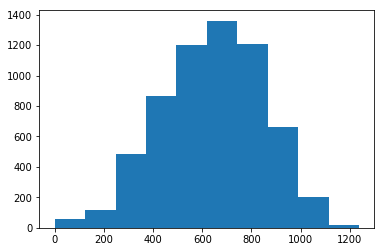

In [10]:
# the histogram of the data
plt.hist(data1['total'])

plt.show()

# TERCER EXAMEN

In [11]:
# creating an object 
file2 = open('final.pdf', 'rb')

# creating a pdf reader object
fileReader2 = PyPDF2.PdfFileReader(file2)

# print the number of pages in pdf file
print(fileReader2)

nro_paginas2 = fileReader2.getNumPages()
print("Hay "+str(nro_paginas2)+" paginas")

Hay 250 paginas


In [12]:
TOTAL2 = []
count = 1
for x in range(nro_paginas2):
    primera_pagina = fileReader2.getPage(x)

    # Obtenemos el cuerpo del texto
    cuerpo = primera_pagina.extractText()
    cuerpo = cuerpo.split("Impresión:",1)
    cuerpo = cuerpo[1]
    cuerpo = cuerpo.split("OCAD-UNI")
    cuerpo = cuerpo[0]
    #cuerpo

    #Separamos por codigos
    regex = r'([0-9]{5}[A-Z])'
    tx = re.compile(regex).split(cuerpo)
    arrayAlumnos = []
    
    for i in range(1,len(tx),2):
        codigo = tx[i]
        resto = tx[i+1]
        alumno = {}
        alumno['codigo'] = codigo
        pat = r'\*[A-Z][0-9]\*'
        part1 = re.compile(pat).split(resto)
        if (len(part1)==1):
            arr = re.compile(" ").split(part1[0])
            notas = arr[0]
            gg = r',([0-9]{3})|AUSENTE'
            arrNotes = re.compile(gg).split(notas)
            arrNotes = ['AUSENTE' if v is None else v for v in arrNotes]
            if(arrNotes[1]=='AUSENTE'):
                alumno['nota1'] = 0
            else:
                alumno['nota1'] = float(arrNotes[0]+'.'+arrNotes[1])

            if(arrNotes[3]=='AUSENTE'):
                alumno['nota2'] = 0
            else:
                alumno['nota2'] = float(arrNotes[2]+'.'+arrNotes[3])

            if(arrNotes[5]=='AUSENTE'):
                alumno['nota3'] = 0
            else:
                alumno['nota3'] = float(arrNotes[4]+'.'+arrNotes[5])

            alumno['puntajefinal'] = float(arrNotes[6]+'.'+arrNotes[7])
            alumno['notavigesimal'] = float(arrNotes[8]+'.'+arrNotes[9])
            alumno['especialidad'] = '-'
        elif (len(part1)==2):
            pat2 = r'([A-Z])'
            arr = re.compile(" ").split(part1[1])
            especialidad = arr[1:]
            especialidad[0] = ''.join([i for i in especialidad[0] if not i.isdigit()])
            especialidad = " ".join(especialidad)
            nota = arr[0]
            gg = r',([0-9]{3})'
            nota = re.compile(gg).split(nota)
            alumno['nota1'] = float(nota[0]+'.'+nota[1])
            alumno['nota2'] = float(nota[2]+'.'+nota[3])
            alumno['nota3'] = float(nota[4]+'.'+nota[5])
            alumno['puntajefinal'] = float(nota[6]+'.'+nota[7])
            alumno['notavigesimal'] = float(nota[8]+'.'+nota[9])
            alumno['especialidad'] = especialidad
        #print(alumno)
        arrayAlumnos.append(alumno)
    TOTAL2 = TOTAL2 + arrayAlumnos


In [13]:
len(TOTAL2)

5571

## Data Analysis

In [14]:
data2 = pd.DataFrame(TOTAL2)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 7 columns):
codigo           5571 non-null object
especialidad     5571 non-null object
nota1            5571 non-null float64
nota2            5571 non-null float64
nota3            5571 non-null float64
notavigesimal    5571 non-null float64
puntajefinal     5571 non-null float64
dtypes: float64(5), object(2)
memory usage: 304.7+ KB


In [15]:
data2.head()

,codigo,especialidad,nota1,nota2,nota3,notavigesimal,puntajefinal
0,30021F,-,446.36,180.0,0.0,6.789,626.36
1,30113D,CIENCIA DE LA COMPUTACIÓN,430.96,348.0,421.0,13.007,1199.96
2,30153I,-,330.84,294.0,364.0,10.719,988.84
3,30162H,-,433.76,360.0,307.0,11.932,1100.76
4,30214A,-,395.48,336.0,384.0,12.091,1115.48


In [18]:
#pd.merge(data1, data2, on="codigo")
dfinal = pd.merge(data1, data2, on=['codigo','nota1','nota2'])
dfinal = dfinal.reindex(columns=["codigo","nombre","nota1","nota2","total","nota3","notavigesimal","puntajefinal","especialidad"])
dfinal = dfinal.drop('total', 1)
dfinal

,codigo,nombre,nota1,nota2,nota3,notavigesimal,puntajefinal,especialidad
0,30346D,ABANTO OCMIN MARTIN GUILLERMO,210.52,1.0,108.0,3.463,319.52,-
1,41901F,ABARCA TINEO EDGAR JUNIOR,559.72,240.0,422.0,13.243,1221.72,-
2,41032G,ABARCA VILLANUEVA PILAR MAURA,183.48,174.0,20.0,4.091,377.48,-
3,62514F,ABATE DOMINGUEZ JOEL SMITH,342.12,180.0,262.0,8.499,784.12,-
4,42154H,ABERGA BELLIDO GIAN PIERO,265.08,27.0,0.0,3.166,292.08,-
5,41919F,ABREGO CRUZ LUIS MIGUEL,297.40,363.0,434.0,11.863,1094.40,-
6,40263F,ABREGO YUCRA JENNIFER MARITZA,505.84,312.0,396.0,13.158,1213.84,-
7,81001K,ABREGU CHILQUILLO AILTON ALEX,429.68,351.0,280.0,11.497,1060.68,INGENIERÍA QUÍMICA
8,41613K,ABURTO RAMÍREZ ALEXANDER MANUEL,506.52,399.0,394.0,14.086,1299.52,-
9,42077F,ACASIETE ARIAS ERNESTO ANIBAL,432.24,12.0,59.0,5.455,503.24,-


## Data Visualization

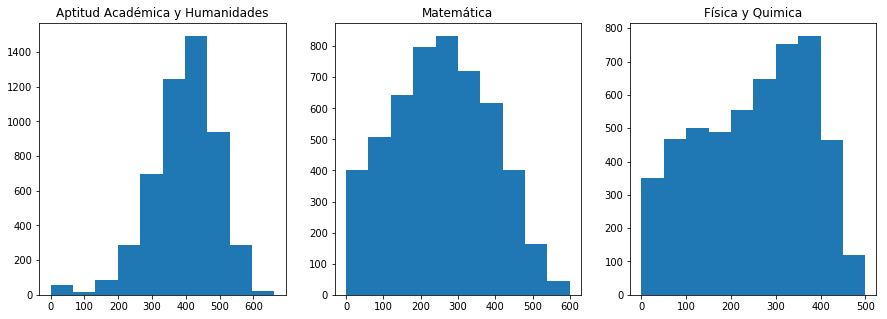

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title('Aptitud Académica y Humanidades')
axs[0].hist(dfinal.nota1)
axs[1].set_title('Matemática')
axs[1].hist(dfinal.nota2)
axs[2].set_title('Física y Quimica')
axs[2].hist(dfinal.nota3)
plt.show()

## Data Exploration

In [30]:
dfinal.loc[dfinal['nota1'].idxmax()]

codigo                               62177K
nombre           FLORES PONTE LUIS FERNANDO
nota1                                 662.2
nota2                                   549
nota3                                   458
notavigesimal                        18.094
puntajefinal                         1669.2
especialidad            INGENIERÍA DE MINAS
Name: 1723, dtype: object

In [31]:
dfinal.loc[dfinal['nota2'].idxmax()]

codigo                                  42087J
nombre           DIONISIO PINEDO ROSA CRISTINA
nota1                                   260.56
nota2                                      600
nota3                                       46
notavigesimal                            9.827
puntajefinal                            906.56
especialidad                                 -
Name: 1451, dtype: object

In [39]:
# Weird Right?

dfinal.loc[dfinal['codigo'] == "42087J"]

,codigo,nombre,nota1,nota2,nota3,notavigesimal,puntajefinal,especialidad
1451,42087J,DIONISIO PINEDO ROSA CRISTINA,260.56,600.0,46.0,9.827,906.56,-


In [32]:
dfinal.loc[dfinal['nota3'].idxmax()]

codigo                                   10115A
nombre           FABIÁN SALINAS ANDRÉS BENJAMÍN
nota1                                    637.64
nota2                                       600
nota3                                       500
notavigesimal                            18.836
puntajefinal                            1737.64
especialidad                 INGENIERÍA QUÍMICA
Name: 1602, dtype: object

In [34]:
dfinal.loc[dfinal['puntajefinal'].idxmax()]

codigo                                   10115A
nombre           FABIÁN SALINAS ANDRÉS BENJAMÍN
nota1                                    637.64
nota2                                       600
nota3                                       500
notavigesimal                            18.836
puntajefinal                            1737.64
especialidad                 INGENIERÍA QUÍMICA
Name: 1602, dtype: object

In [47]:
carreras = dfinal.especialidad.unique()
carreras

array(['-', 'INGENIERÍA QUÍMICA', 'INGENIERÍA PETROQUÍMICA',
       'INGENIERÍA ELECTRÓNICA', 'INGENIERÍA AMBIENTAL',
       'INGENIERÍA ELÉCTRICA', 'INGENIERÍA FÍSICA',
       'INGENIERÍA METALÚRGICA', 'INGENIERÍA CIVIL', 'MATEMÁTICA',
       'INGENIERÍA INDUSTRIAL', 'INGENIERÍA DE SISTEMAS',
       'CIENCIA DE LA COMPUTACIÓN', 'INGENIERÍA DE TELECOMUNICACIONES',
       'INGENIERÍA MECATRÓNICA', 'INGENIERÍA GEOLÓGICA',
       'INGENIERÍA ESTADÍSTICA', 'INGENIERÍA SANITARIA',
       'INGENIERÍA DE PETRÓLEO Y GAS NATURAL', 'FÍSICA',
       'INGENIERÍA MECÁNICA',
       'INGENIERÍA DE HIGIENE Y SEGURIDAD INDUSTRIAL',
       'INGENIERÍA ECONÓMICA', 'INGENIERÍA MECÁNICA-ELÉCTRICA',
       'INGENIERÍA TEXTIL', 'INGENIERÍA NAVAL', 'INGENIERÍA DE MINAS',
       'QUÍMICA'], dtype=object)

In [50]:
dfinal['especialidad'].value_counts()

-                                               4498
INGENIERÍA CIVIL                                  81
INGENIERÍA QUÍMICA                                44
INGENIERÍA ECONÓMICA                              35
INGENIERÍA DE SISTEMAS                            34
INGENIERÍA INDUSTRIAL                             34
INGENIERÍA ELECTRÓNICA                            27
INGENIERÍA MECATRÓNICA                            27
INGENIERÍA MECÁNICA                               27
INGENIERÍA MECÁNICA-ELÉCTRICA                     26
INGENIERÍA AMBIENTAL                              24
MATEMÁTICA                                        22
INGENIERÍA ELÉCTRICA                              21
INGENIERÍA FÍSICA                                 20
INGENIERÍA DE TELECOMUNICACIONES                  20
INGENIERÍA NAVAL                                  19
CIENCIA DE LA COMPUTACIÓN                         18
INGENIERÍA SANITARIA                              18
FÍSICA                                        